# PCA on Real Dataset

---

## What is this?

This notebook shows how to apply **Principal Component Analysis (PCA)**  
to a real dataset, comparing a hand-made `numpy` version  
and `sklearn`'s PCA implementation.

---

## Core idea

- The **covariance matrix** describes how variables vary together.
- PCA diagonalizes the covariance matrix → finds the directions of maximum variance.
- The eigenvectors are the principal components (PCs).
- The eigenvalues show how much variance each PC explains.
- By projecting data onto the top PCs, you keep the main information in fewer dimensions.

---

## What we’ll do

1. Load a simple real dataset (e.g., Iris).
2. Standardize the data.
3. Compute covariance matrix and diagonalize it by hand.
4. Project the data to top PCs.
5. Visualize the results: 2D scatter plot & Scree Plot.
6. Compare with `sklearn` PCA.
7. Write an Interpretation of how PCA works.

---

## Goal

> Be able to explain how PCA rotates and projects data to the most informative axes,  
> and why it helps in dimensionality reduction.


In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data  # shape (150, 4)
print("Original shape:", X.shape)


Original shape: (150, 4)


In [2]:
# Standardize: mean-center each feature
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

print("Feature means (should be ~0):", np.mean(X_centered, axis=0))


Feature means (should be ~0): [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]


In [3]:
# Covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance matrix:\n", cov_matrix)

# Eigenvalues & eigenvectors
eigvals, eigvecs = np.linalg.eigh(cov_matrix)
# Sort from largest to smallest
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Eigenvalues:", eigvals)
print("Explained variance ratio:", eigvals / np.sum(eigvals))


Covariance matrix:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
Eigenvalues: [4.22824171 0.24267075 0.0782095  0.02383509]
Explained variance ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


In [4]:
# Project data
PCs = eigvecs[:, :2]
X_pca = X_centered @ PCs

print("Projected shape:", X_pca.shape)


Projected shape: (150, 2)


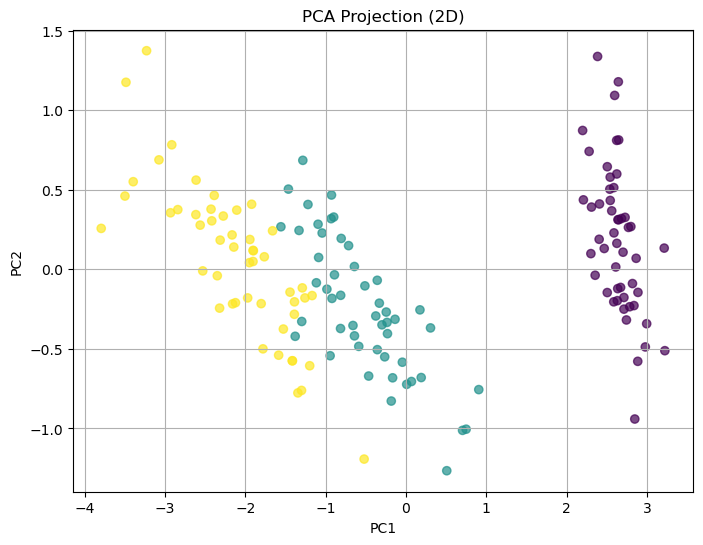

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7, c=iris.target, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (2D)")
plt.grid(True)
plt.show()


## Interpretation – PCA Projection

- The plot shows how the Iris dataset looks when projected onto its first 2 principal components (PC1 and PC2).
- PC1 captures the largest variance direction; PC2 captures the next largest, orthogonal to PC1.
- Each color represents a different class, which PCA does not use — it shows how well the data naturally separates.
- This means PCA has found a plane that retains most of the original structure in fewer dimensions.

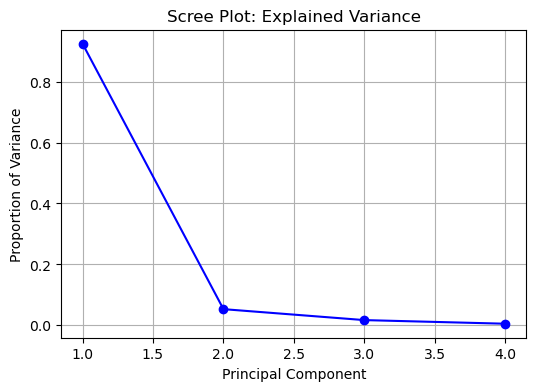

In [6]:
explained_variance_ratio = eigvals / np.sum(eigvals)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(eigvals)+1), explained_variance_ratio, 'bo-')
plt.title("Scree Plot: Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance")
plt.grid(True)
plt.show()


## Interpretation – Scree Plot

- The Scree Plot shows how much variance each principal component explains.
- The first PC explains about 90% of the total variance.
- The second PC explains about 5%.
- The remaining components contribute very little.
- This means projecting the data onto the first 2 PCs retains almost all the important structure.
- This is why PCA is so effective for dimensionality reduction:
  most of the information is concentrated in just a few directions.


sklearn Explained Variance Ratio: [0.92461872 0.05306648 0.01710261 0.00521218]


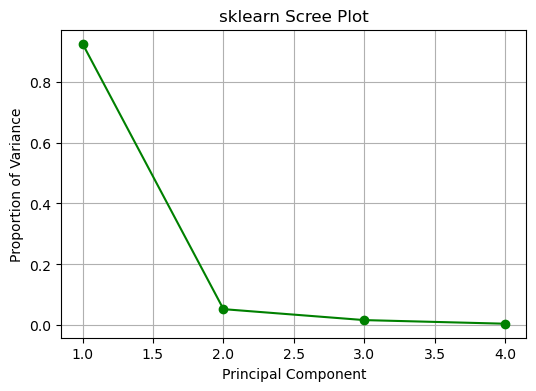

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca_sklearn = pca.fit_transform(X)

print("sklearn Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, 'go-')
plt.title("sklearn Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance")
plt.grid(True)
plt.show()


## Interpretation – sklearn vs numpy

- The Scree Plot from sklearn matches the numpy version.
- Both show that PC1 alone explains over 90% of the variance.
- PC2 adds a small amount; PCs 3 and 4 are negligible.
- This confirms that PCA always works by diagonalizing the covariance matrix,
  whether done manually or using a library.
- The Scree Plot tells us that we can safely reduce dimensions to 1 or 2
  without losing much information.


## Interpretation

- The **covariance matrix** tells us which features vary together.
- PCA diagonalizes this matrix:
  - The eigenvectors are the new axes (principal components).
  - The eigenvalues tell us how much variance each PC explains.
- Projecting to the first 2 PCs keeps most of the variance.
- The Scree Plot shows how much each PC contributes.
- `sklearn` PCA does the same thing as our `numpy` version.
- The data cloud gets “rotated” to align with the directions of maximum spread.
- This is the same idea as SVD: find the best basis to simplify the data.

> PCA is a practical way to “change the basis”  
> to directions that make your data clearer and more compact.
